In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse, Rectangle
from matplotlib.collections import PatchCollection

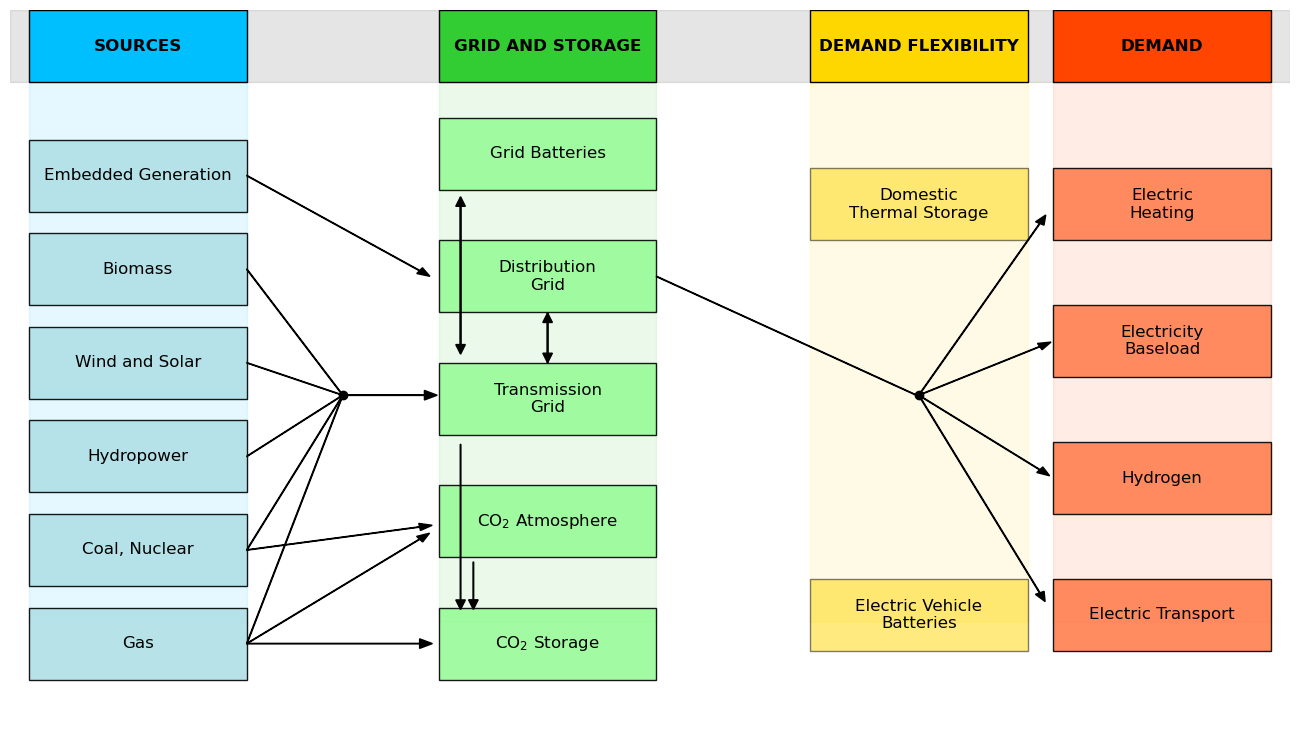

In [211]:
left_edge = 0
right_edge = 2
bottom_edge = 0
top_edge = 1.5

w = right_edge - left_edge
h = top_edge - bottom_edge

# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig = plt.figure()
ax = fig.add_axes(
    [left_edge, bottom_edge, right_edge-left_edge, top_edge-bottom_edge],
    frameon=False,
    # aspect=1
    )

box_width = 0.17 * w
box_height = 0.1 * h

outer_gap = 0.1 * w

left_column_center = left_edge + outer_gap
right_column_center = right_edge - outer_gap
center_left_column_center = outer_gap + left_edge + (right_edge - left_edge - 2*outer_gap) / 5 * 2
# center_right_column_center = outer_gap + left_edge + (right_edge - left_edge - 2*outer_gap) / 3 * 2
center_right_column_center = right_column_center - box_width - 0.02 * w

# ax.add_collection(PatchCollection(patches, facecolor='none', edgecolor='k', linewidths=1))

# topline
toprow_vcenter = 0.95 * top_edge
background_gap = 0.2 * h - 0.03 * h - 0.2 * box_height
for s, x in zip(
    ['SOURCES', 'GRID AND STORAGE', 'DEMAND FLEXIBILITY', 'DEMAND'],
    [left_column_center, center_left_column_center, center_right_column_center, right_column_center],):
    ax.text(x, toprow_vcenter, s, ha="center", va='center', fontsize=12, weight='bold')

# patches = []
ax.add_patch(Rectangle(
    (left_column_center - box_width/2, toprow_vcenter - box_height/2),
    box_width, box_height, facecolor='deepskyblue', edgecolor='k',))
ax.add_patch(Rectangle(
    (left_column_center - box_width/2, bottom_edge + background_gap),
    box_width, h - background_gap,
    facecolor='deepskyblue', edgecolor='deepskyblue', linewidth=1, alpha=0.1, zorder=0,
    ))

ax.add_patch(Rectangle((center_left_column_center - box_width/2, toprow_vcenter - box_height/2),
    box_width, box_height, facecolor='limegreen', edgecolor='k',))
ax.add_patch(Rectangle(
    (center_left_column_center - box_width/2, bottom_edge + background_gap),
    box_width, h - background_gap,
    facecolor='limegreen', edgecolor='limegreen', linewidth=1, alpha=0.1, zorder=0,
    ))

ax.add_patch(Rectangle((center_right_column_center - box_width/2, toprow_vcenter - box_height/2),
    box_width, box_height, facecolor='gold', edgecolor='k',))
ax.add_patch(Rectangle(
    (center_right_column_center - box_width/2, bottom_edge + background_gap),
    box_width, h - background_gap,
    facecolor='gold', edgecolor='gold', linewidth=1, alpha=0.1, zorder=0,
    ))


ax.add_patch(Rectangle((right_column_center - box_width/2, toprow_vcenter - box_height/2),
    box_width, box_height, facecolor='orangered', edgecolor='k',))
ax.add_patch(Rectangle(
    (right_column_center - box_width/2, bottom_edge + background_gap),
    box_width, h - background_gap,
    facecolor='orangered', edgecolor='orangered', linewidth=1, alpha=0.1, zorder=0,
    ))


# boxes of generators --------------------------------------------------------------------------
ax.scatter(
    [left_column_center + (center_left_column_center - left_column_center) / 2],
    [bottom_edge + 0.465 * h],
    color="k",
)

gap = 0.03 * h
bottom_gap = 0.2 * h
generators = ["Embedded Generation", "Biomass", "Wind and Solar", "Hydropower", "Coal, Nuclear", "Gas"]
for i, name in enumerate(generators[::-1]):
    ax.text(
        left_column_center, 
        bottom_gap + gap * (i-1) + box_height * (i-1) + box_height / 2,
        name, ha="center", va='center', fontsize=12)
    ax.add_patch(Rectangle(
        (left_column_center - box_width / 2, 
        bottom_gap + gap * (i-1) + box_height * (i-1)),
        box_width, box_height, edgecolor='k', facecolor='powderblue', alpha=0.9,
        ))
    if i == len(generators) - 1:
        continue
    x = left_column_center + box_width / 2
    y = bottom_gap + gap * (i-1) + box_height * (i-1) + box_height / 2
    dx = left_column_center + (center_left_column_center - left_column_center) / 2 - x
    dy = bottom_edge + 0.465 * h - y

    # shorter_factor = 0.85
    shorter_factor = 1.
    ax.arrow(
        x, y, dx*shorter_factor, dy*shorter_factor,
        # head_width=0.01, head_length=0.02, fc='k', ec='k',
        head_width=0., head_length=0., fc='k', ec='k',
        )
ax.arrow(x+dx, y+dy, dx*0.85, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')

ax.arrow(# gas to co2 storage
    left_column_center + box_width / 2,
    bottom_gap - gap - box_height / 2,
    (center_left_column_center - left_column_center - box_width) * 0.9,
    0,
    head_width=0.02, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# gas to co2 atm
    left_column_center + box_width / 2,
    bottom_gap - gap - box_height / 2,
    (center_left_column_center - left_column_center - box_width) * 0.9,
    gap + box_height * 1.15,
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# coal nuclear to co2 atm
    left_column_center + box_width / 2,
    bottom_gap + box_height / 2,
    (center_left_column_center - left_column_center - box_width) * 0.9,
    box_height * 0.32,
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# embedded to distribution grid
    left_column_center + box_width / 2,
    bottom_gap + 4 * gap + box_height * 4.5,
    (center_left_column_center - left_column_center - box_width) * 0.9,
    -box_height * 1.32,
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )

# boxes of flex -------------------------------------------------------------------------------
gap = bottom_edge + 0.47 * h
bottom_gap = bottom_edge + 0.11 * h
for i, name in enumerate(["Domestic\nThermal Storage", "Electric Vehicle\nBatteries"][::-1]):
    ax.text(
        center_right_column_center, 
        bottom_gap + gap * i + box_height * i + box_height / 2,
        name, ha="center", va='center', fontsize=12)
    ax.add_patch(Rectangle(
        (center_right_column_center - box_width / 2, 
        bottom_gap + gap * i + box_height * i),
        # box_width, box_height, edgecolor='k', facecolor='lemonchiffon', alpha=0.9,
        box_width, box_height, edgecolor='k', facecolor='gold', alpha=0.5,
        ))

# boxes of network and grid  -------------------------------------------------------------------
gap = 0.07 * h
bottom_gap = 0.24 * h
for i, name in enumerate([r"CO$_2$ Storage", r"CO$_2$ Atmosphere", "Transmission\nGrid", "Distribution\nGrid", "Grid Batteries"]):
    ax.text(
        center_left_column_center, 
        bottom_gap + gap * (i-1) + box_height * (i-1) + box_height / 2,
        name, ha="center", va='center', fontsize=12)
    ax.add_patch(Rectangle(
        (center_left_column_center - box_width / 2, 
        bottom_gap + gap * (i-1) + box_height * (i-1)),
        box_width, box_height, edgecolor='k', facecolor='palegreen', alpha=0.9,
        ))

ax.arrow(# grid batteries, transmission grid
    center_left_column_center - box_width * 2/5,
    bottom_gap + gap + box_height * 2 + 0.02,
    0.,
    0.85 * (2 * gap + box_height),
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# grid batteries, transmission grid
    center_left_column_center - box_width * 2/5,
    bottom_gap + gap + box_height * 2 + 0.9 * (2 * gap + box_height) + 0.02,
    0.,
    - 0.85 * (2 * gap + box_height),
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# DAC elec
    center_left_column_center - box_width * 2/5,
    bottom_gap + gap + box_height - 0.02,
    0,
    - 0.9 * (2 * gap + box_height),
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# DAC co2
    center_left_column_center - box_width * 2/5 + 0.02,
    bottom_gap + - 0.01,
    0,
    - 0.75 * (gap),
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# transmission distribution
    center_left_column_center,
    bottom_gap + gap + box_height * 2,
    0,
    0.8 * (gap),
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow(# transmission distribution reverse
    center_left_column_center,
    bottom_gap + gap + box_height * 2 + 0.8 * (gap) + 0.02,
    0,
    - 0.8 * (gap),
    head_width=0.015, head_length=0.02, fc='k', ec='k'
    )
ax.arrow( # distribution to dot
    center_left_column_center + box_width / 2,
    bottom_gap + 2*gap + box_height * 2.5,
    (center_right_column_center - center_left_column_center - 0.5 * box_width) * 1,
    - 1.5 * box_height * 1.11,
    head_width=0.0, head_length=0.0, fc='k', ec='k',
    )

ax.add_patch(Rectangle(
    (left_edge, toprow_vcenter - 0.5*box_height),
    w, box_height,
    facecolor='k', edgecolor='k', linewidth=1, alpha=0.1, zorder=0,
    ))


# boxes of loads -------------------------------------------------------------------------------
gap = 0.09 * h
bottom_gap = 0.3 * h

ax.scatter(
    [center_right_column_center],
    [bottom_edge + 0.465 * h],
    color="k",
)
x = center_right_column_center
y = bottom_edge + 0.465 * h
# for i, name in enumerate(["Hydrogen\nDemand", "Other\nElectricity\nDemand", "Electric\nTransport\nDemand", "Electric\nHeating\nDemand"]):
# for i, name in enumerate(["Electric\nTransport\nDemand", "Hydrogen\nDemand", "Other\nElectricity\nDemand", "Electric\nHeating\nDemand"]):
for i, name in enumerate(["Electric Transport", "Hydrogen", "Electricity\nBaseload", "Electric\nHeating"]):
    ax.text(
        right_column_center, 
        bottom_gap + gap * (i-1) + box_height * (i-1) + box_height / 2,
        name, ha="center", va='center', fontsize=12)
    ax.add_patch(Rectangle(
        (right_column_center - box_width / 2, 
        bottom_gap + gap * (i-1) + box_height * (i-1)),
        box_width, box_height, edgecolor='k', facecolor='coral', alpha=0.9,
        ))

    short_factor = 0.9
    ax.arrow(
        x, y,
        (right_column_center-x-0.5*box_width) * short_factor,
        (bottom_gap + gap * (i-1) + box_height * (i-1) + box_height / 2 - y) * short_factor,
        head_width=0.015, head_length=0.02, fc='k', ec='k'
    )


# ---------------------------------------------------------------------------------------------

    

ax.set_xlim(left_edge, right_edge)
ax.set_ylim(bottom_edge, top_edge)
# ax.arrow(2, 1, 2, 1, head_width=0.2, head_length=0.2, fc='k', ec='k')

plt.axis('off')

background_color = "white"
ax.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

plt.savefig('flowchart_intro.pdf', bbox_inches='tight')
plt.show()